In [27]:
import pims
import torch as tr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
from omegaconf import OmegaConf
import os

from vre import VRE
from vre.representations import build_representations_from_cfg
from vre.utils import get_project_root, image_read, collage_fn, image_write

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
video = pims.Video(get_project_root() / "resources/test_video.mp4")
video.file = get_project_root() / "resources/test_video.mp4"
print(video)

<FramesSequenceND>
Axes: 3
Axis 'x' size: 1280
Axis 'y' size: 720
Axis 't' size: 5395
Pixel Datatype: uint8


In [29]:
os.environ["VRE_DEVICE"] = device = "cuda" if tr.cuda.is_available() else "cpu"
all_representations_dict = OmegaConf.load(open(Path.cwd() / "cfg.yaml", "r"))
representations = build_representations_from_cfg(all_representations_dict)
print(representations)

[2024-11-11T11:40:37 VRE-DEBUG] Doing topological sort... (build_representations.py:build_representations_from_cfg:128)
[2024-11-11T11:40:37 VRE-INFO] Building 'depth/marigold' (vre name: depth_marigold) (build_representations.py:build_representation_from_cfg:76)
[2024-11-11T11:40:37 VRE-DEBUG] [Marigold(depth_marigold)] Setting default 'Learned' params: {'device': 'cuda'} (build_representations.py:build_representation_from_cfg:89)
[2024-11-11T11:40:37 VRE-DEBUG] [Marigold(depth_marigold)] Setting default 'Compute' params: {} (build_representations.py:build_representation_from_cfg:102)
[2024-11-11T11:40:37 VRE-DEBUG] [Marigold(depth_marigold)] Setting default 'I/O' params: {'binary_format': 'npz', 'image_format': 'png', 'compress': True} (build_representations.py:build_representation_from_cfg:115)
[2024-11-11T11:40:37 VRE-INFO] Building 'depth/dpt' (vre name: depth_dpt) (build_representations.py:build_representation_from_cfg:76)
[2024-11-11T11:40:37 VRE-DEBUG] [DepthDpt(depth_dpt)] Set

{'depth_marigold': Marigold(depth_marigold), 'depth_dpt': DepthDpt(depth_dpt), 'rgb': RGB(rgb), 'normals_svd(depth_marigold)': DepthNormalsSVD(normals_svd(depth_marigold) ['depth_marigold']), 'normals_svd(depth_dpt)': DepthNormalsSVD(normals_svd(depth_dpt) ['depth_dpt'])}


In [30]:
vre = VRE(video, representations)
output_dir = Path.cwd() / "here"
shutil.rmtree(output_dir, ignore_errors=True)
print(vre)
start_frame = np.random.randint(0, len(video) - 5)
end_frame = start_frame + 1
res = vre.run(output_dir=output_dir, start_frame=start_frame, end_frame=end_frame,
              output_dir_exists_mode="skip_computed")
display(pd.DataFrame(res["run_stats"]))

[2024-11-11T11:40:37 VRE-INFO] [VRERuntimeArgs]
- Video path: '/home/mihai/code/ml/video-representations-extractor/resources/test_video.mp4'
- Representations (5): depth_marigold, depth_dpt, rgb, normals_svd(depth_marigold), normals_svd(depth_dpt)
- Video shape: (5395, 720, 1280, 3) (FPS: 29.97)
- Output frames (1): [2584 : 2584]
- Exception mode: 'stop_execution'
- #threads DataStorer: 0 (0 = only using main thread)
 (video_representations_extractor.py:run:71)
[2024-11-11T11:40:37 VRE-DEBUG] [DataStorer-depth_marigold] Set up with 0 threads. (data_storer.py:__init__:30)
[2024-11-11T11:40:37 VRE-INFO] Running:
Marigold(depth_marigold)
[DataStorer]
- Num threads: 0 (0 = only using main thread)
[DataWriter]
- Representation: 'Marigold(depth_marigold)'
- Output dir: '/home/mihai/code/ml/video-representations-extractor/examples/dev_notebook/here' (exists mode: 'skip_computed')
- Export binary: True (binary format: npz, compress: True)
- Export image: True (image format: png) (video_represe


[VRE]
- Video: <FramesSequenceND>
Axes: 3
Axis 'x' size: 1280
Axis 'y' size: 720
Axis 't' size: 5395
Pixel Datatype: uint8
- Representations (5): [Marigold(depth_marigold), DepthDpt(depth_dpt), RGB(rgb), DepthNormalsSVD(normals_svd(depth_marigold) ['depth_marigold']), DepthNormalsSVD(normals_svd(depth_dpt) ['depth_dpt'])]


[2024-11-11T11:40:41 VRE-DEBUG] Loading weights from '/home/mihai/code/ml/video-representations-extractor/resources/weights/depth/marigold/vae.pt' (resources.py:vre_load_weights:73)
[2024-11-11T11:40:41 VRE-DEBUG] Loading weights from '/home/mihai/code/ml/video-representations-extractor/resources/weights/depth/marigold/marigold-lcm-v1-0_unet.pt' (resources.py:vre_load_weights:73)
[VRE] depth_marigold bs=1: 100%|██████████| 1/1 [00:12<00:00, 12.62s/it]
[2024-11-11T11:40:49 VRE-DEBUG] [DataStorer-depth_dpt] Set up with 0 threads. (data_storer.py:__init__:30)
[2024-11-11T11:40:49 VRE-INFO] Running:
DepthDpt(depth_dpt)
[DataStorer]
- Num threads: 0 (0 = only using main thread)
[DataWriter]
- Representation: 'DepthDpt(depth_dpt)'
- Output dir: '/home/mihai/code/ml/video-representations-extractor/examples/dev_notebook/here' (exists mode: 'skip_computed')
- Export binary: True (binary format: npz, compress: True)
- Export image: True (image format: png) (video_representations_extractor.py:_do

,depth_marigold,depth_dpt,rgb,normals_svd(depth_marigold),normals_svd(depth_dpt)
0,11.281464,3.745734,0.106035,9.55575,9.311569


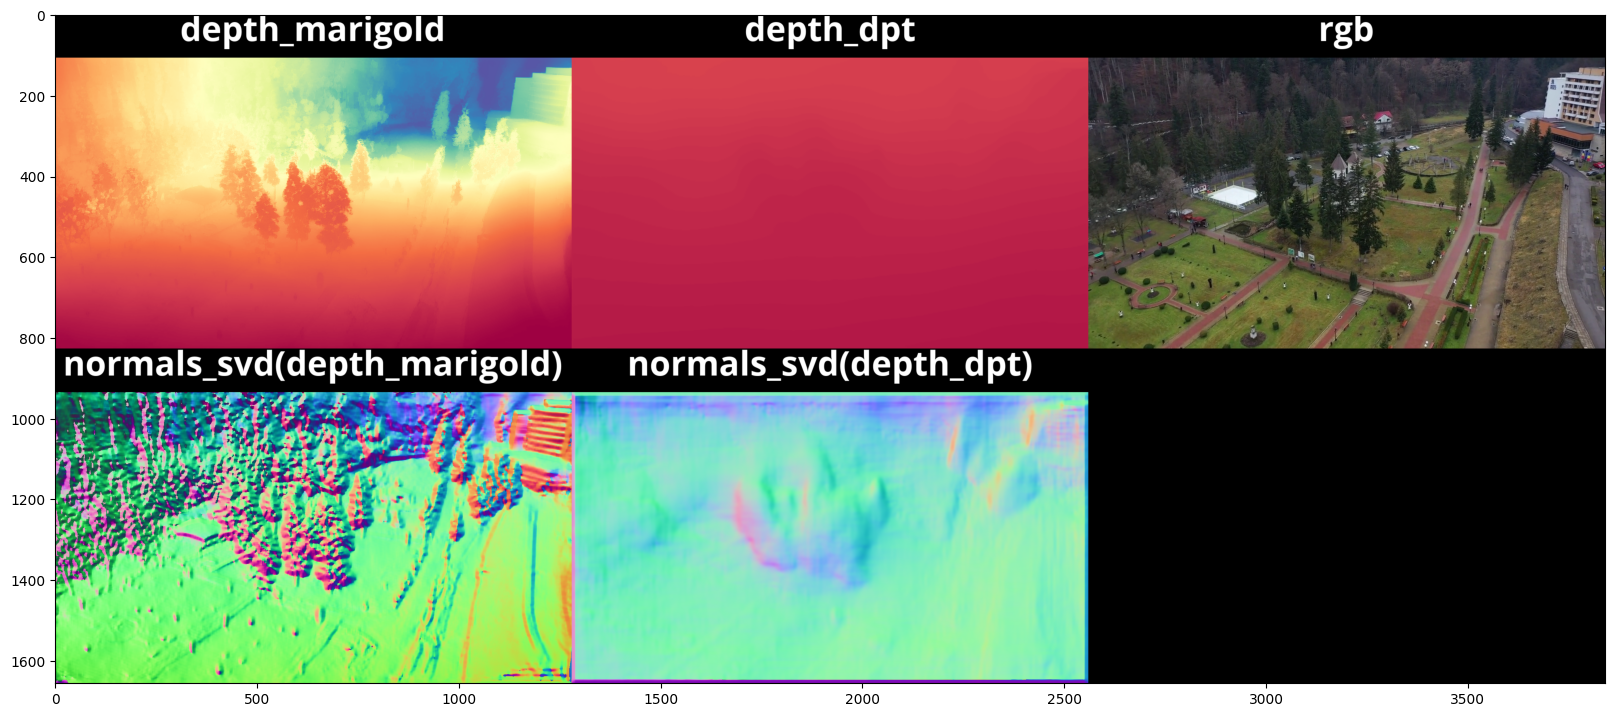

In [31]:
frames = [x.name for x in Path(output_dir / "rgb/png").iterdir()]
start_frame = np.random.permutation(frames)[0]
imgs = [image_read(output_dir / r / "png" / start_frame) for r in vre.representations]
collage = collage_fn(imgs, titles=vre.representations, size_px=70, rows_cols=None)
image_write(collage, f"collage_{start_frame}")
plt.figure(figsize=(20, 10))
plt.imshow(collage)
plt.show()